# Cargas, campo y fuerza electrostática
## Primer ejercicio
Un electrón con una capacidad de trabajo de $72090×10^{−19}$ J orbita de manera perpendicular a un campo magnético de 3250 G. ¿Cuál es el radio de la órbita? ¿Y su frecuencia y periodo angular? Resuelve el mismo ejercicio para un antineutrón.
![](https://github.com/iratxelejarreta/T1/blob/master/t2actividad1.png?raw=true)



### Importar frameworks

In [60]:
from pint import UnitRegistry
pintunits = UnitRegistry()
import sympy as sp
from sympy import *
import sympy.physics.units as sp_u
import scipy.constants as sp_c
import math

from sympy.physics.units import *
from sympy import *
import sympy.physics.units as pu

from IPython.display import SVG

init_printing()

### Convertir de Gauss a Tesla

In [61]:
valor = (3250 * pintunits.gauss).to(pintunits.tesla).magnitude * sp_u.tesla
valor

### Ecuaciones
#### Energía cinética
$E_c = \frac{1}{2}mv^2$
#### Lorentz
$q_e v_\mathrm{e}B = \frac{m_ev_e^2}{r}$

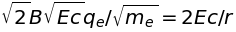

In [62]:
# Declaramos las variables de todas las ecuaciones
q_e, v, v_e, B, m, m_e, r, Ec = symbols('q_e v v_e B m m_e r Ec', positive = True, real = True)
eq_lorentz = Eq(q_e*v_e*B, (m_e*v_e**2)/r)
e_cinetica = Eq(Ec, (m*v**2)/2)

ecuacion = (eq_lorentz.subs(v_e, solve(e_cinetica, v)[0])).subs(m, m_e)
ecuacion

#### Resolución de la ecuación
$\frac{\sqrt{2E_c}Bq_e}{\sqrt{m_e}} = \frac{2E_c}{r}$

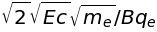

In [63]:
expresion = solve(ecuacion, r)[0]
expresion

$r = \frac{\sqrt{2E_cm}}{Bq}$

In [64]:
valor = 0.325 * sp_u.tesla
energia_cinetica = 72090E-19 * sp_u.joule
masa_electron = sp_c.electron_mass * sp_u.kg
carga_electron = sp_c.electron_volt * sp_u.coulombs
radio = expresion.subs([(B, valor), (m_e, masa_electron), (q_e, carga_electron), (Ec, energia_cinetica)])
N(radio)

## Frecuencia y Periodo angular

$W = \frac{2pi}{T}$

In [65]:
velocidad = solve(e_cinetica, v)[0]
velocidad

$W = \frac{2pi}{2pir}{v}$

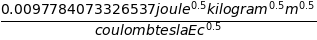

In [66]:
tiempo = 2*pi*radio/velocidad
N(tiempo)

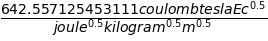

In [67]:
frecuencia = 2*pi/tiempo
N(frecuencia)

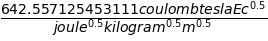

In [68]:
frecuencia2 = velocidad/radio
N(frecuencia2)

###### Antineutrón: no orbita. carga=0

## Segundo ejercicio
Calcula el módulo de la fuerza magnética que actúa sobre un electrón proveniente del Sol que penetra en la aurora boreal joviana. Haz cálculos aproximados basados en la búsqueda de información relativa a Júpiter, su campo magnético y el fundamento físico de una aurora boreal. Asume que la velocidad del electrón es prácticamente la de la luz.
![](http://en.es-static.us/upl/2011/08/jupiter-aurora.jpg)

#### Lorentz force

$$F = {qv}{B}$$

q: carga $q = 1.6*10^{-19}$ C <br />
v: velocidad de partícula (velocidad de la luz) $v = 3*10^{8}$ m/s <br />
B: campo magnético $B = 778*10^{6}$ Km 

In [69]:
F, q, v, B = symbols('F q v B', positive = True, real = True)
f_lorentz = Eq(F, (q*v*B))
ecu = solve(f_lorentz, F)[0]
ecu

In [70]:
carga = 1.6E-19 * sp_u.coulombs
velocidad_particula = sp_c.speed_of_light * sp_u.m / sp_u.second
campo_magnetico = 778E6 * sp_u.km

fuerza_magnetica = ecu.subs([(q, carga), (v, velocidad_particula), (B, campo_magnetico)])
fuerza_magnetica = convert_to(fuerza_magnetica, N)
N(fuerza_magnetica)

## Tercer ejercicio

Se tiene una cantidad pequeña de material lubricante de masa 2.41×1010 u (unidades de masa atómica) y una carga de 4.8×10−19 C. La gota de aceite se encuentra flotando en equilibrio gracias a la harmonía de la fuerza gravitatoria más otra fuerza extra de naturaleza eléctrica. ¿Cuál es la dirección y magnitud del campo eléctrico originado por dicha fuerza? ¿A qué te recuerda la experiencia descrita? Justifica tu respuesta.
![](https://github.com/iratxelejarreta/T1/blob/master/t2actividad3.png?raw=true)

### svg image
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg version="1.1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" preserveAspectRatio="xMidYMid meet" viewBox="0 0 640 640" width="640" height="640">
<defs>
    <path d="M347.16 240.82C347.16 275.13 320.01 302.97 286.57 302.97C253.14 302.97 225.99 275.13 225.99 240.82C225.99 206.52 253.14 178.67 286.57 178.67C320.01 178.67 347.16 206.52 347.16 240.82Z" id="b6bR17HBKB"></path>
    <path d="M303.57 136.42L285.56 97.57L269.58 137.29L280.35 137.01L281.42 178.67L293.9 178.35L292.82 136.69L303.57 136.42Z" id="c18OXhuAHW"></path>
    <path d="M269.57 344.92L287.04 384.01L303.57 344.52L292.8 344.64L292.31 302.97L279.83 303.12L280.32 344.79L269.57 344.92Z" id="a7VKQdzEkQ"></path>
</defs>
<g>
<g>
<g>
    <use xlink:href="#b6bR17HBKB" opacity="1" fill="#2e9234" fill-opacity="0"></use>
<g>
    <use xlink:href="#b6bR17HBKB" opacity="1" fill-opacity="0" stroke="#000000" stroke-width="3" stroke-opacity="1"></use>
</g>
</g>
<g>
    <use xlink:href="#c18OXhuAHW" opacity="1" fill="#2e9234" fill-opacity="0"></use>
<g>
    <use xlink:href="#c18OXhuAHW" opacity="1" fill-opacity="0" stroke="#000000" stroke-width="2" stroke-opacity="1"></use>
</g>
</g>
<g>
    <use xlink:href="#a7VKQdzEkQ" opacity="1" fill="#2e9234" fill-opacity="0"></use>
<g>
    <use xlink:href="#a7VKQdzEkQ" opacity="1" fill-opacity="0" stroke="#000000" stroke-width="2" stroke-opacity="1"></use>
</g>
</g>
</g>
</g>
</svg>

$$E = \frac{mg}{q}$$

$m = 2.41*10^{10}$ U <br />
$g = 9.81$ N <br />
$q = 4.8*10^{-19}$ C 

In [71]:
m, g, q, E = symbols('m g q E', positive = True, real = True)

m = 2.41E10 * sp_u.amu.convert_to(pu.kilogram)
g = sp_u.acceleration_due_to_gravity
q = 4.8E-19 * sp_u.C

formula = Eq(E, ((m*g)/q))
resultado = convert_to((solve(formula, E)[0]), volt/meter)
N(resultado)